# Emax vs sfr_n

In [2]:
# imports
import numpy as np

from matplotlib import pyplot as plt

# Load

In [5]:
cube_out = np.load('../Analysis/Cubes/craco_sfr_Emax_cube.npz')

In [6]:
ll = cube_out['ll']

In [7]:
lEmax = cube_out['lEmax']
sfr = cube_out['sfr_n']
#
dE = lEmax[1]-lEmax[0]
dsfr = sfr[1] - sfr[0]

In [8]:
ll -= ll.max()

In [12]:
lEmax.min(), lEmax.max()

(40.5, 42.5)

In [11]:
sfr.min(), sfr.max()

(0.0, 4.0)

# Plot

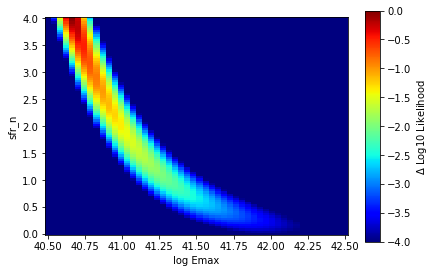

In [15]:
plt.clf()
ax = plt.gca()

im=plt.imshow(ll.T,cmap='jet',origin='lower', 
                  interpolation='None', extent=[40.5-dE/2, 42.5+dE/2, 0.-dsfr/2, 4+dsfr/2],
              aspect='auto', vmin=-4.
             )#aspect=aspect)
# Color bar
cbar=plt.colorbar(im,fraction=0.046, shrink=1.2,aspect=15,pad=0.05)
cbar.set_label(r'$\Delta$ Log10 Likelihood')
#
ax.set_xlabel('log Emax')
ax.set_ylabel('sfr_n')
plt.savefig('fig_sfr_vs_Emax.png', dpi=200)
plt.show()